In [1]:
from backtesting import Strategy, Backtest
from backtesting.lib import resample_apply
from backtesting import Backtest
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import datetime as datetime
import pandas as pd
import plotly.graph_objs as go
import plotly
from pandas_datareader import data as web
plt.style.use("fivethirtyeight")

D:\Anaconda\lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
#tarihler 
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2022,1,1)

In [3]:
AAPL = web.DataReader("AAPL","yahoo",start,end)

In [4]:
AAPL.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.075390
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.068253
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.259014
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,41.728756
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.573765


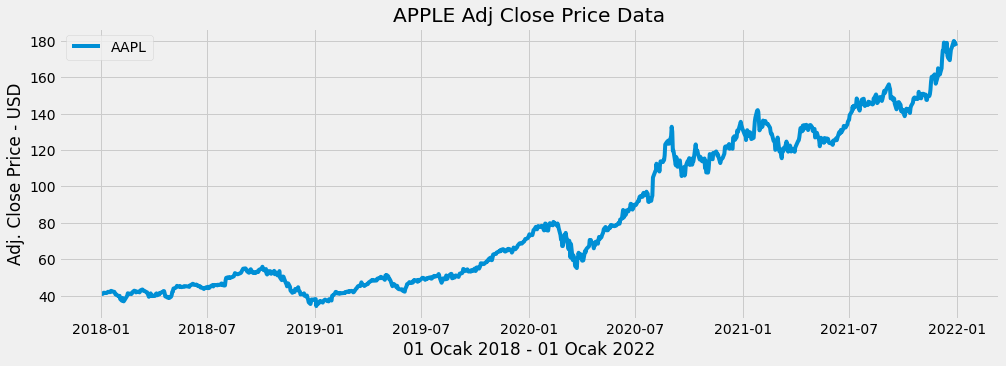

In [5]:
#grafik
plt.figure(figsize=(15,5))
plt.plot(AAPL["Adj Close"],label = "AAPL")
plt.title("APPLE Adj Close Price Data")
plt.xlabel("01 Ocak 2018 - 01 Ocak 2022")
plt.ylabel("Adj. Close Price - USD")
plt.legend(loc="upper left")
plt.show()

In [6]:
t_pair_df = pd.DataFrame(AAPL,columns=[
    "Open","High","Low","Close","Volume",
    "Adj Close"])

In [7]:
df_A = t_pair_df
df_A

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,102223600.0,41.075390
2018-01-03,43.132500,43.637501,42.990002,43.057499,118071600.0,41.068253
2018-01-04,43.134998,43.367500,43.020000,43.257500,89738400.0,41.259014
2018-01-05,43.360001,43.842499,43.262501,43.750000,94640000.0,41.728756
2018-01-08,43.587502,43.902500,43.482498,43.587502,82271200.0,41.573765
...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,74919600.0,179.836319
2021-12-28,180.160004,181.330002,178.529999,179.289993,79144300.0,178.799149
2021-12-29,179.330002,180.630005,178.139999,179.380005,62348900.0,178.888916


In [8]:
#simple moving average 30 günlük
SMA30 = pd.DataFrame()
SMA30["Adj Close Price"]= AAPL["Adj Close"].rolling(30).mean()
#simple moving average 100 günlük
SMA100 = pd.DataFrame()
SMA100["Adj Close Price"]= AAPL["Adj Close"].rolling(100).mean()

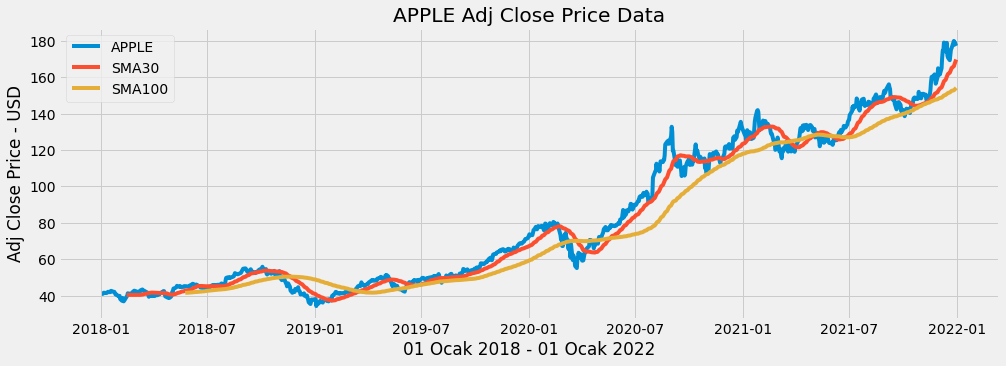

In [9]:
plt.figure(figsize=(15,5))
plt.plot(AAPL["Adj Close"],label = "APPLE")
plt.plot(SMA30["Adj Close Price"], label = "SMA30")
plt.plot(SMA100["Adj Close Price"], label = "SMA100")
plt.title("APPLE Adj Close Price Data")
plt.xlabel("01 Ocak 2018 - 01 Ocak 2022")
plt.ylabel("Adj Close Price - USD")
plt.legend(loc="upper left")
plt.show()

In [10]:
#datasetler için yeni bir datafram
data =pd.DataFrame()
data["AAPL"] = AAPL["Adj Close"]
data["SMA30"] = SMA30["Adj Close Price"]
data["SMA100"] = SMA100["Adj Close Price"]
data.tail(5)

,AAPL,SMA30,SMA100
Date,,,
2021-12-27,179.836319,165.988996,152.782986
2021-12-28,178.799149,166.962988,153.108731
2021-12-29,178.888916,167.939641,153.442345
2021-12-30,177.712143,168.843825,153.764689
2021-12-31,177.083878,169.644295,154.085630


In [11]:
#al sat sinyalleri
def signal(data):
    Signal_Price_Buy = []
    Signal_Price_Sell= []
    flag = -1
    
    for i in range(len(data)):
        if data["SMA30"][i] > data["SMA100"][i]:
            if flag != 1:
                Signal_Price_Buy.append(data["AAPL"][i])
                Signal_Price_Sell.append(np.nan)
                flag = 1
            else:
                Signal_Price_Buy.append(np.nan)
                Signal_Price_Sell.append(np.nan)
        elif data["SMA30"][i] < data["SMA100"][i]:
            if flag != 0:
                Signal_Price_Buy.append(np.nan)
                Signal_Price_Sell.append(data["AAPL"][i])
                flag = 0
            else:
                Signal_Price_Buy.append(np.nan)
                Signal_Price_Sell.append(np.nan)
        else:
            Signal_Price_Buy.append(np.nan)
            Signal_Price_Sell.append(np.nan)
            
    return(Signal_Price_Buy,Signal_Price_Sell)        

In [12]:
signal = signal(data)
data['Buy_Signal_Price'] = signal[0]
data['Sell_Signal_Price']= signal[1]

In [13]:
data.tail()

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2021-12-27,179.836319,165.988996,152.782986,NaN,NaN
2021-12-28,178.799149,166.962988,153.108731,NaN,NaN
2021-12-29,178.888916,167.939641,153.442345,NaN,NaN
2021-12-30,177.712143,168.843825,153.764689,NaN,NaN
2021-12-31,177.083878,169.644295,154.085630,NaN,NaN


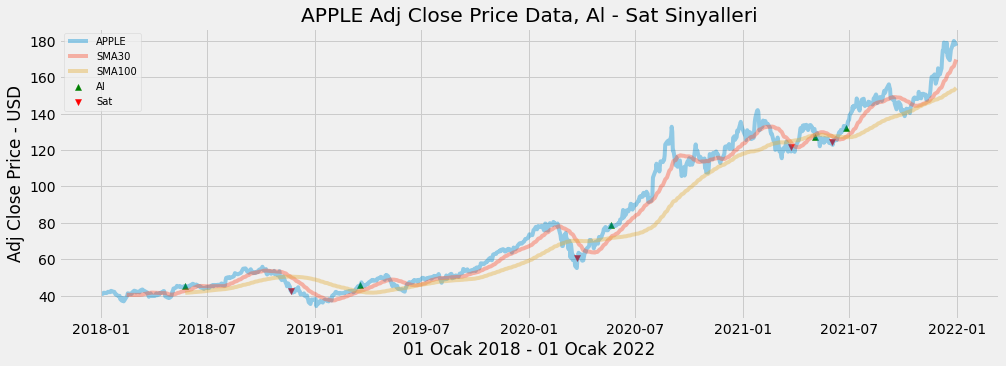

In [14]:
#al sat sinyalleri
plt.figure(figsize=(15,5))
plt.plot(data["AAPL"],label = "APPLE", alpha = 0.40)
plt.plot(data["SMA30"], label = "SMA30", alpha = 0.40)
plt.plot(data["SMA100"], label = "SMA100", alpha = 0.40)
plt.scatter(data.index,data["Buy_Signal_Price"], label = "Al", marker = "^", color = "green")
plt.scatter(data.index,data["Sell_Signal_Price"], label = "Sat", marker = "v", color = "red")
plt.title("APPLE Adj Close Price Data, Al - Sat Sinyalleri")
plt.xlabel("01 Ocak 2018 - 01 Ocak 2022")
plt.ylabel("Adj Close Price - USD")
plt.legend(loc="upper left", fontsize=10)
plt.show()

In [15]:
def SMA(array, n):
    #sma
    return pd.Series(array).rolling(n).mean()

def RSI(array, n):
    #rsi
    # yakşalık hesapla
    gain = pd.Series(array).diff()
    loss = gain.copy()
    gain[gain < 0] = 0
    loss[loss > 0] = 0
    rs = gain.ewm(n).mean() / loss.abs().ewm(n).mean()
    return 100 - 100 / (1 + rs)

In [4]:
#Al pozisyonu:
# Weekly RSI > Daily RSI > 70 ise al
# Close > SMA 10 > SMA 30

#Pozisyonun kapanması
# Close değerleri SMA 10 'un altında ve 2%den fazlaysa
# 8% sabit kesinti

In [20]:
class System(Strategy):
    d_rsi = 30  # Günlük RSI inceleme dönemi
    w_rsi = 30  # Haftalık
    level = 70
    
    def init(self):
        # 10,30 günlük sma
        self.ma10 = self.I(SMA, self.data.Close, 10)
        self.ma30 = self.I(SMA, self.data.Close, 30)
        
        # 30 günlük rsi hesaplaması
        self.daily_rsi = self.I(RSI, self.data.Close, self.d_rsi)
        
        # haftalık rsi oluşturmak için resample_apply kullanıldı
        self.weekly_rsi = resample_apply("W-FRI", RSI, self.data.Close, self.w_rsi)
        
        
    def next(self):
        price = self.data.Close[-1]
        
        # pozisyon yoksa uzun girin
        if (not self.position and
            self.daily_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.daily_rsi[-1] and
            self.ma10[-1] > self.ma30[-1]  and 
            price > self.ma10[-1]):
            
            # Al sinyali ancak sonrasında 8% kayıp yaşanır
            self.buy(sl=.92 * price)
        
        # Fiyat 2% nin altında veya MA10 un altında olursa kapat 
        elif price < .98 * self.ma10[-1]:
            self.position.close()

In [21]:
APPLE=yf.download("AAPL",start="2018-01-01", end="2022-01-01",auto_adjust = True)

backtest = Backtest(APPLE, System, commission=.002)
stats= backtest.run()

[*********************100%***********************]  1 of 1 completed


In [22]:
%%time

backtest.optimize(d_rsi=range(10, 35, 5),
                  w_rsi=range(10, 35, 5),
                  level=range(30, 80, 10))

  0%|          | 0/9 [00:00<?, ?it/s]

Wall time: 8.9 s


Start                     2018-01-02 00:00:00
End                       2021-12-31 00:00:00
Duration                   1459 days 00:00:00
Exposure Time [%]                   45.734127
Equity Final [$]                 24312.438187
Equity Peak [$]                  25157.910902
Return [%]                         143.124382
Buy & Hold Return [%]              331.118964
Return (Ann.) [%]                   24.869717
Volatility (Ann.) [%]               21.855688
Sharpe Ratio                         1.137906
Sortino Ratio                        2.159561
Calmar Ratio                         1.178818
Max. Drawdown [%]                  -21.097164
Avg. Drawdown [%]                   -2.986165
Max. Drawdown Duration      455 days 00:00:00
Avg. Drawdown Duration       35 days 00:00:00
# Trades                                   19
Win Rate [%]                        47.368421
Best Trade [%]                      48.892613
Worst Trade [%]                      -8.08274
Avg. Trade [%]                    

In [23]:
backtest.plot()

Row(id='1520', ...)

In [24]:
#strateji ile gerçekleştirilen işlemler
stats['_trades']

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,142,498,520,70.078655,76.795335,953.768572,0.095845,2019-12-24,2020-01-28,35 days
1,138,522,524,78.903414,74.756291,-572.302967,-0.052559,2020-01-30,2020-02-03,4 days
2,96,651,674,108.001827,118.802675,1036.881412,0.100006,2020-08-04,2020-09-04,31 days
